In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.colors
import os
import numpy as np
import math
import cmath
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.figsize'] = (7,8)
plt.rcParams['axes.labelsize'] = 20

Let's do a plot k x gamma/u or k x u/gamma (relative field:external energies) with field.

decide on: alpha = -5, c = .5, n=6, kappa=H0=0.

At each k from .2 to 1.2, I need field energies for all a, but only alpha=-5, c=.6 simultaions.

In [22]:
ks = range(8,13,1)
alpha=-5
c=0.5

In [23]:
paths= dict([])
for k in ks:
    paths_k = dict([(a,"/home/jsk/cylinder/fixed_surfaces/n1k"+str(k)+"a"+str(a)) for a in range(10)])
    paths[k] = paths_k

In [24]:
def sort_csv(filename, dtype=float, fct=(lambda x: abs(x))):
    if dtype==complex:
        dtype = str
        data=pd.read_csv(filename, index_col=0)
        data=data.applymap(complex)
        data=data.applymap(lambda x: fct(x))
    else:
        data=pd.read_csv(filename, index_col=0, dtype=dtype)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    return data

In [25]:
field_energies=dict([])
for k in ks:
    field_energies_k = dict([(a,sort_csv(os.path.join(paths[k][a], "field_energy.csv"), dtype=complex)) for a in paths[k]])
    field_energies[k]= field_energies_k
#dict to dataframe


FileNotFoundError: [Errno 2] No such file or directory: '/home/jsk/cylinder/fixed_surfaces/n1k8a0/field_energy.csv'

In [17]:
field_energies[6][6].loc[c,alpha]

KeyError: 6

I then combine with surface tension to get energy minimizing a.

Retrieve surface area values (all energies are /2pi)

In [ ]:
surfdatatens=pd.read_csv("chapter2data/surfenergytens.csv", index_col=0)
surfdatatens

In [ ]:
curvdatatens=pd.read_csv("chapter2data/curvenergytens.csv", index_col=0)
curvdatatens

In [ ]:
minimum_as = dict([])
minimum_Es = dict([])
gammas=np.arange(0,50,1)
kappa=0
for gamma in gammas:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for k in ks:
        energies = [(field_energies[k][a].loc[c, alpha]+gamma*2*math.pi*surfdatatens.loc[a/10,str(k/10)]+kappa*math.pi*curvdatatens.loc[a/10,str(k/10)]
                     ,a) for a in paths[k]]
        energy, a = min(energies)
        minimum_as_row[k]= a
        minimum_Es_row[k] = energy*(k/10)
    minimum_as[gamma]=minimum_as_row
    minimum_Es[gamma] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)
sb.heatmap(minimum_as)
plt.gca().invert_yaxis()

In [ ]:
minimum_as = dict([])
minimum_Es = dict([])
gamma=100
kappas=np.arange(0,70, 1)
alpha=-4
c=0.5
for kappa in kappas:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for k in ks:
        energies = [(field_energies[k][a].loc[c, alpha]+gamma*2*math.pi*surfdatatens.loc[a/10,str(k/10)]+kappa*math.pi*curvdatatens.loc[a/10,str(k/10)]
                     ,a) for a in paths[k]]
        energy, a = min(energies)
        minimum_as_row[k]= a
        minimum_Es_row[k] = energy*(k/10)
    minimum_as[kappa]=minimum_as_row
    minimum_Es[kappa] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)
sb.heatmap(minimum_as, cmap='bone', vmin=0, vmax=9)
plt.gca().invert_yaxis()

In [6]:
minimum_as = dict([])
minimum_Es = dict([])
gamma=100
kappa=10
alpha=-3
cs=np.arange(.5,9.5, 1)
for c in cs:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for k in ks:
        energies = [(1*field_energies[k][a].loc[c, alpha]+gamma*2*math.pi*surfdatatens.loc[a/10,str(k/10)]+kappa*math.pi*curvdatatens.loc[a/10,str(k/10)]
                     ,a) for a in paths[k]]
        energy, a = min(energies)
        minimum_as_row[k]= a
        minimum_Es_row[k] = energy*(k/10)
    minimum_as[c]=minimum_as_row
    minimum_Es[c] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)
sb.heatmap(minimum_as, cmap='bone',vmin=0, vmax=1)
plt.gca().invert_yaxis()

KeyError: 2

In [7]:
minimum_as = dict([])
minimum_Es = dict([])
gamma=100
kappa=0
exts=np.arange(0, 3, .01)
for ext in exts:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for k in ks:
        energies = [(ext*field_energies[k][a].loc[c, alpha]+gamma*2*math.pi*surfdatatens.loc[a/10,str(k/10)]+kappa*math.pi*curvdatatens.loc[a/10,str(k/10)]
                     ,a) for a in paths[k]]
        energy, a = min(energies)
        minimum_as_row[k]= a
        minimum_Es_row[k] = energy*(k/10)
    minimum_as[ext]=minimum_as_row
    minimum_Es[ext] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)
sb.heatmap(minimum_as, vmax=10, vmin=0, cmap='bone')
plt.gca().invert_yaxis()

KeyError: 2

alpha=-5, c=.5: We see that field strength >1/100th gamma stabilizes, field strengt <1/600th gamma has no effect.  

Tried other things: with alpha=-1, c=.5 field has no effect from gamma=100.  At alpha=-5, c=8.5, the upper limit is similar form as before, but field also stabilizes on smaller k (longer objects).  These are of the type that only go between N=0 and no field.  This regime seems to start at c=3.5, though more adjustments are possible on longer (smaller k) cylinders.

smaller k - more extreme surface area difference - would think surface tension part more likely to win.  But unexpectedly differences in field energy are also more extreme on longer cylinders, where choosing between N=0 and isotropic.  At high c, field can't adjust profile either.

At high c, high alpha (5.5, -5) cylinder is stabilized almost everywhere - maybe the two regions hae joined

Now using alpha=-3, c=5.5 to see interesting effect

Only amplitudes 0 or .9 are seen so far.

In [8]:
sb.heatmap(minimum_Es)
plt.gca().invert_yaxis()

ValueError: Must pass 2-d input. shape=()

Additionally look at all the minimum configurations and label them - in this case just the a=.9 s from different ksets.

In [11]:
def kcrit(g, alpha, c, n, u=1):
    #g is gamma/kappa ratio
    # then c is similarly c/kappa ,  i.e. kappa set to 1
    discriminant1 =-23 + 12* g+4 * g**2
    if alpha<0:
        discriminant1 -=32*(abs(alpha)*c*n**2/(2*u))
    if discriminant1<0:
        return None
    else:
        discriminant2 = 1-2*g+  math.sqrt(discriminant1)
        #print(discriminant2)
        if discriminant2 <0:
            return None
        else:
            return .5*math.sqrt(discriminant2)

In [15]:
gs = list(np.arange(1, 100, .01))
gs.extend([100,500,1000,10000,100000])

minimum_as = dict([])
minimum_Es = dict([])
gamma=1
kappas=np.arange(0,.7, .01)
alpha=1
c=1.5
for kappa in kappas:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for k in range(2,6):
        minimum_as_row[k]= np.nan
    for k in ks:
        energies = [(0.01*field_energies[k][a].loc[c, alpha]+gamma*2*math.pi*surfdatatens.loc[a/10,str(k/10)]
                     +kappa*math.pi*curvdatatens.loc[a/10,str(k/10)]
                     ,a/10) for a in paths[k]]
        energy, a = min(energies)
        minimum_as_row[k]= a
        minimum_Es_row[k] = energy*(k/10)
    minimum_as[kappa]=minimum_as_row
    minimum_Es[kappa] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)
minimum_as.index=[x/10 for x in minimum_as.index]
minimum_as.columns=[round(x,5) for x in minimum_as.columns]
sb.heatmap(minimum_as, cmap='bone', vmin=0, vmax=.9,cbar_kws={'label': '|a|'})

kcrits_ = [kcrit(g, alpha=.01*alpha, c=c, n=6) for g in gs]
plt.plot([1/g*len(minimum_as.columns)/.7 for g,kc in zip(gs, kcrits_) if kc is not None], 
         [(kc-.25)*len(minimum_as.index)/1.0 for kc in kcrits_ if kc is not None], color='red')
kcrits_0 = [kcrit(g, alpha=0, c=0, n=0) for g in gs]
#plt.plot([1/g*len(minimum_as.columns)/.7 for g,kc in zip(gs, kcrits_0) if kc is not None], 
#         [(kc-.25)*len(minimum_as.index)/1.0 for kc in kcrits_0 if kc is not None], color='red', linestyle=":")

plt.gca().invert_yaxis()
plt.ylabel('k_c')
plt.xlabel('kappa/gamma')
#plt.savefig("k_kappa_mapline_n6_alpha1_c1p5.png")

Text(0.5, 16.14432328961706, 'kappa/gamma')

RuntimeError: latex was not able to process the following string:
b'k_c'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jsk/.cache/matplotlib/tex.cache/92bf046ec49000074d245f9ad5363022.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 5 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file 92bf046ec49000074d245f9ad5363022.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\sffamily k_
                  c}
No pages of output.
Transcript written on 92bf046ec49000074d245f9ad5363022.log.




<Figure size 432x288 with 2 Axes>

(0.0, 0.7)

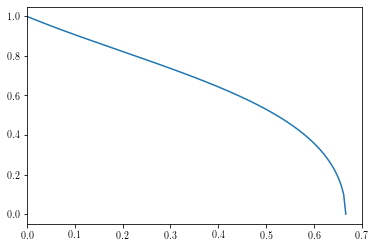

In [16]:
#alpha=-4
kcrits_ = [kcrit(g, alpha=.01*alpha, c=c, n=6) for g in gs]
plt.plot([1/g for g,kc in zip(gs, kcrits_) if kc is not None], [kc for kc in kcrits_ if kc is not None])
plt.xlim((0,.7))
#plt.savefig("k_kappa_line_n6_alpham-4_c1p5.png")

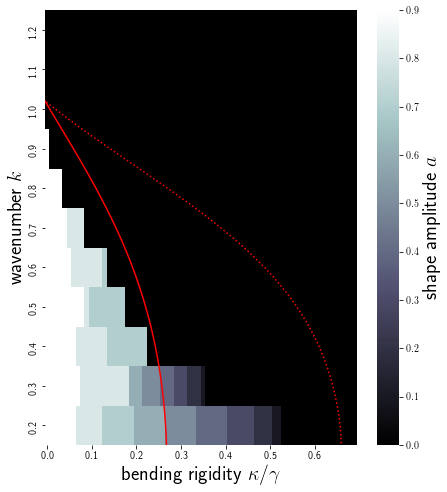

In [40]:
minimum_as = dict([])
minimum_Es = dict([])
gamma=1
kappas=np.arange(0,.7, .01)
alpha=-4
c=1.5
for kappa in kappas:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for k in range(2,6):
        minimum_as_row[k]= np.nan
    for k in ks:
        energies = [(.01*field_energies[k][a].loc[c, alpha]+gamma*2*math.pi*surfdatatens.loc[a/10,str(k/10)]+kappa*math.pi*curvdatatens.loc[a/10,str(k/10)]
                     ,a) for a in paths[k]]
        energy, a = min(energies)
        minimum_as_row[k]= a/10
        minimum_Es_row[k] = energy*(k/10)
    minimum_as[kappa]=minimum_as_row
    minimum_Es[kappa] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)
minimum_as.index=[x/10 for x in minimum_as.index]
minimum_as.columns=[round(x,5) for x in minimum_as.columns]
sb.heatmap(minimum_as, cmap='bone', vmin=0, vmax=.9, cbar_kws={'label': r'shape amplitude $a$'},
          xticklabels=10)

kcrits_ = [kcrit(g, alpha=.01*alpha, c=c, n=6) for g in gs]
plt.plot([1/g*len(minimum_as.columns)/.7 for g,kc in zip(gs, kcrits_) if kc is not None], 
         [(kc-.05)*len(minimum_as.index)/1.2 for kc in kcrits_ if kc is not None], color='red')
kcrits_0 = [kcrit(g, alpha=0, c=0, n=0) for g in gs]
plt.plot([1/g*len(minimum_as.columns)/.7 for g,kc in zip(gs, kcrits_0) if kc is not None], 
         [(kc-.05)*len(minimum_as.index)/1.2 for kc in kcrits_0 if kc is not None], color='red', linestyle=":")

plt.gca().invert_yaxis()
plt.ylabel(r'wavenumber $k$')
plt.xlabel(r'bending rigidity $\kappa/\gamma$')
plt.savefig("k_kappa_mapline_n6_alpham4_c1p5.png")

In [61]:
paths[6]

{0: '/home/jsk/cylinder/fixed_surfaces/k6a0',
 1: '/home/jsk/cylinder/fixed_surfaces/k6a1',
 2: '/home/jsk/cylinder/fixed_surfaces/k6a2',
 3: '/home/jsk/cylinder/fixed_surfaces/k6a3',
 4: '/home/jsk/cylinder/fixed_surfaces/k6a4',
 5: '/home/jsk/cylinder/fixed_surfaces/k6a5',
 6: '/home/jsk/cylinder/fixed_surfaces/k6a6',
 7: '/home/jsk/cylinder/fixed_surfaces/k6a7',
 8: '/home/jsk/cylinder/fixed_surfaces/k6a8',
 9: '/home/jsk/cylinder/fixed_surfaces/k6a9'}